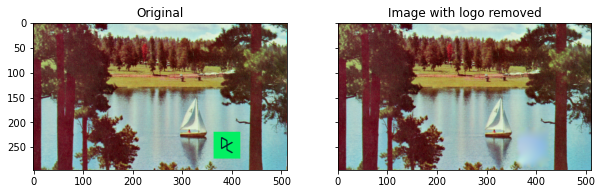

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from skimage import io
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color
from matplotlib.pyplot import *
image_with_logo = plt.imread('logo.png')

#plot_comparison
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    #ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    #ax2.axis('off')

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                                mask,
                                                multichannel=True)

# Show the original and logo removed images
plot_comparison(image_with_logo, image_logo_removed, 'Image with logo removed')
